In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

%matplotlib inline

In [190]:
df_customers = pd.read_csv('datasets/customers.csv', parse_dates=['created_at'],
                          date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y %I:%M %p'))
df_orders = pd.read_csv('datasets/order_items.csv', parse_dates=['created_at'],
                          date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y %I:%M %p'))
df_items = pd.read_csv('datasets/po_items.csv', parse_dates=['created_at'],
                          date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y %I:%M %p'))
df_reviews = pd.read_csv('datasets/Reviews_export_2024_09_10_14_47_09.783.csv', parse_dates=['Review Creation Date'],
                          date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y %I:%M %p'))

C:\Users\user\AppData\Local\Temp\ipykernel_11044\2084181180.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_customers = pd.read_csv('datasets/customers.csv', parse_dates=['created_at'],
C:\Users\user\AppData\Local\Temp\ipykernel_11044\2084181180.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_orders = pd.read_csv('datasets/order_items.csv', parse_dates=['created_at'],
C:\Users\user\AppData\Local\Temp\ipykernel_11044\2084181180.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_items = pd.read_csv('datasets/po_it

In [191]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260896 entries, 0 to 260895
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     260896 non-null  int64         
 1   order_id               260896 non-null  int64         
 2   description            260895 non-null  object        
 3   sku                    260896 non-null  object        
 4   regular_price          260262 non-null  float64       
 5   price                  260896 non-null  float64       
 6   qty                    260896 non-null  int64         
 7   subtotal               260896 non-null  float64       
 8   total_discount_amount  260896 non-null  float64       
 9   code                   1386 non-null    object        
 10  description.1          48196 non-null   object        
 11  tax_amount             260896 non-null  float64       
 12  total                  260896 non-null  floa

In [192]:
df_customers.head(3)

,id,order_id,description,sku,regular_price,price,qty,subtotal,total_discount_amount,code,description.1,tax_amount,total,created_at
0,679118,496977,TaylorMade SIM Max Iron Set 5-PW and AW Stiff ...,TM-S17427,799.99,799.99,1,799.99,0.0,NaN,NaN,40.00,839.99,2021-09-10 00:00:00
1,679119,496978,TaylorMade M4 Iron Set 5-PW and AW Regular Rig...,TM-S17574,699.99,699.99,1,699.99,70.0,NaN,2021-01 - 10% Welcome - Unique Codes,94.34,724.33,2021-09-10 00:04:00
2,679120,496978,Titleist 816H1 4 Hybrid 23¬∞ Regular Right-Han...,TS-H08614,109.99,109.99,1,109.99,11.0,NaN,2021-01 - 10% Welcome - Unique Codes,14.82,113.81,2021-09-10 00:04:00


In [193]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261287 entries, 0 to 261286
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     261287 non-null  int64         
 1   order_id               261287 non-null  int64         
 2   customer_id            261287 non-null  int64         
 3   description            261286 non-null  object        
 4   model                  260950 non-null  object        
 5   brand                  260950 non-null  object        
 6   type                   260950 non-null  object        
 7   model_id               260950 non-null  float64       
 8   sku                    261287 non-null  object        
 9   currency               261287 non-null  object        
 10  regular_price          260653 non-null  float64       
 11  price                  261287 non-null  float64       
 12  qty                    261287 non-null  int6

In [194]:
df_orders.head(3)

,id,order_id,customer_id,description,model,brand,type,model_id,sku,currency,regular_price,price,qty,subtotal,total_discount_amount,code,description.1,tax_amount,total,created_at
0,679118,496977,329221,TaylorMade SIM Max Iron Set 5-PW and AW Stiff ...,SIM Max,TaylorMade,Iron Set,11150.0,TM-S17427,CAD,799.99,799.99,1,799.99,0.0,NaN,NaN,40.00,839.99,2021-09-10 00:00:00
1,679119,496978,416222,TaylorMade M4 Iron Set 5-PW and AW Regular Rig...,M4,TaylorMade,Iron Set,9277.0,TM-S17574,CAD,699.99,699.99,1,699.99,70.0,NaN,2021-01 - 10% Welcome - Unique Codes,94.34,724.33,2021-09-10 00:05:00
2,679120,496978,416222,Titleist 816H1 4 Hybrid 23¬∞ Regular Right-Han...,816H1,Titleist,Hybrid,7562.0,TS-H08614,CAD,109.99,109.99,1,109.99,11.0,NaN,2021-01 - 10% Welcome - Unique Codes,14.82,113.81,2021-09-10 00:05:00


In [195]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235854 entries, 0 to 235853
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 235854 non-null  int64         
 1   customer_id        235854 non-null  int64         
 2   purchase_order_id  235854 non-null  int64         
 3   status             235854 non-null  object        
 4   model              235854 non-null  object        
 5   product_type       235854 non-null  object        
 6   brand              235854 non-null  object        
 7   model_id           235854 non-null  int64         
 8   brand_id           235854 non-null  int64         
 9   product_type_id    235854 non-null  int64         
 10  price              235854 non-null  float64       
 11  currency           235854 non-null  object        
 12  subtotal           0 non-null       float64       
 13  margin_total       235854 non-null  float64 

In [196]:
df_items['received_at'] = pd.to_datetime(df_items['received_at'], format='%m/%d/%y %I:%M %p', errors='coerce')
df_items['inspected_at'] = pd.to_datetime(df_items['inspected_at'], format='%m/%d/%y %I:%M %p', errors='coerce')

In [197]:
df_items.head(9)

,id,customer_id,purchase_order_id,status,model,product_type,brand,model_id,brand_id,product_type_id,price,currency,subtotal,margin_total,bonus_total,total,created_at,received_at,inspected_at
0,767181,416193,43112,Rejected,XR,Driver,Callaway,5622,5,2,95.0,CAD,NaN,0.0,9.5,104.5,2021-09-10 00:30:00,NaT,NaT
1,767182,416228,43113,Open,M3,Driver,TaylorMade,9265,28,2,150.0,USD,NaN,0.0,15.0,165.0,2021-09-10 01:30:00,NaT,NaT
2,767183,416228,43113,Open,AP2 716 Forged,Iron Set,Titleist,7505,30,4,390.0,USD,NaN,0.0,39.0,429.0,2021-09-10 01:30:00,NaT,NaT
3,767184,415077,43114,Open,SIM Max,Iron Set,TaylorMade,11150,28,4,325.0,USD,NaN,0.0,65.0,390.0,2021-09-10 01:30:00,NaT,NaT
4,767185,416235,43115,Open,Blueprint,Iron Set,Ping,11197,21,4,645.0,USD,NaN,0.0,129.0,774.0,2021-09-10 01:30:00,NaT,NaT
5,767186,317142,43116,Open,718 AP1,Iron Set,Titleist,8815,30,4,460.0,CAD,NaN,0.0,46.0,506.0,2021-09-10 02:00:00,NaT,NaT
6,767187,416249,43117,Accepted,M1 460 2017,Driver,TaylorMade,8285,28,2,175.0,CAD,NaN,0.0,17.5,192.5,2021-09-10 02:30:00,NaT,2021-09-23 12:15:00
7,767188,392519,43118,Accepted,Huntington Beach Soft 4,Putter,Cleveland,34902,7,6,60.0,CAD,NaN,0.0,6.0,66.0,2021-09-10 02:30:00,NaT,2021-09-23 14:33:00
8,767189,392519,43118,Accepted,G SF Tec,Driver,Ping,7773,21,2,165.0,CAD,NaN,0.0,16.5,181.5,2021-09-10 02:30:00,NaT,2021-09-23 14:32:00


In [198]:
df_items.received_at.nunique()

0

In [199]:
df_reviews['Order Date'] = pd.to_datetime(df_reviews['Order Date'], format='%m/%d/%Y')

In [200]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693 entries, 0 to 10692
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Review ID               10693 non-null  int64         
 1   Review Creation Date    10693 non-null  datetime64[ns]
 2   Review Type             10693 non-null  object        
 3   Review Status           10693 non-null  object        
 4   Status Details          0 non-null      float64       
 5   Review Source           10693 non-null  object        
 6   Review Score            10693 non-null  int64         
 7   Review Title            10691 non-null  object        
 8   Review Content          10691 non-null  object        
 9   Sentiment Score         10687 non-null  float64       
 10  Profanity Flag          45 non-null     float64       
 11  Published Image URLs    0 non-null      float64       
 12  Unpublished Image URLs  139 non-null    object

In [201]:
df_reviews.head(3)

,Review ID,Review Creation Date,Review Type,Review Status,Status Details,Review Source,Review Score,Review Title,Review Content,Sentiment Score,...,Product Handle,Product Group,Product Category,Product UPC,Product SKU,Product Brand,Product MPN,Product ISBN,Incentivized Flag,Metaobject handle
0,620130900,2024-09-09 20:07:00,site_review,Published,NaN,site_review_after_product,5,Great product and as promised,Great product and as promised delivery date. I...,0.991433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,620130775,2024-09-09 20:05:00,product_review,Published,NaN,reminder,5,Great clubs and in very,Great clubs and in very good condition at a gr...,0.985991,...,NaN,NaN,NaN,NaN,5-763#,Callaway,NaN,NaN,NaN,NaN
2,620125988,2024-09-09 19:35:00,product_review,Published,NaN,syndication,5,I love them and they,I love them and they are in great condition,0.979976,...,NaN,NaN,NaN,NaN,NaN,Titleist,NaN,NaN,NaN,NaN


# 1. Who is Laps.com
**Market place where people buy and sell or trade their golf clubs and others golfs items**

A customer can be both a buyer and seller

Do they buy only their branded golfs products they sell, or anyone can come and sell their golfs product even if they haven bought them with the brand?

To answer this question, lets observe the clients that are both buyers and sellers, if any.

The datasets df_customers and df_orders are connected by the id column, where the df_orders details the recordings about the orders from the df_customers.

At the same time, the sku column is an indicator that the orders have stock keeping unit (unique identifier of a product).

The df_items contains the orders of the buyers, judging by the column with statuses and columns with timestamps for the date of inspection and receipt.

The relationship between df_orders and df_items is built on the column customer_id. So lets merge the datasets of sellers an buyers to observe whether 

In [202]:
df_customers_orders = pd.merge(df_orders, df_items, on='customer_id', how='inner')

In [203]:
check_customers = df_customers_orders[['customer_id', 'brand_x', 'brand_y']].groupby(['customer_id', 'brand_x', 'brand_y'], as_index=False).size()
check_customers['same_brand'] = check_customers['brand_x'] == check_customers['brand_y']

In [204]:
customers_with_no_true = check_customers.groupby('customer_id')['same_brand'].apply(lambda x: all(x == False))

customers_with_no_true_ids = customers_with_no_true[customers_with_no_true].index

df_filtered = df_customers_orders[df_customers_orders['customer_id'].isin(customers_with_no_true_ids)]

brand_combinations = df_filtered[['customer_id', 'brand_x', 'brand_y']].drop_duplicates()
brand_combinations

,customer_id,brand_x,brand_y
127,397347,Footjoy,Ping
129,416319,Wilson,Mizuno
139,265955,TaylorMade,Cleveland
141,265955,TaylorMade,Nike
142,265955,TaylorMade,Cobra
...,...,...,...
551685,1198330,Ping,PXG
551686,1198330,Ping,Tour Edge
551687,431862,TaylorMade,Ping
551688,1198371,Ping,TaylorMade


In [205]:
# Count unique customers in Dataset 1
unique_customers_df1 = df_orders['customer_id'].nunique()

# Count unique customers in Dataset 2
unique_customers_df2 = df_items['customer_id'].nunique()

unique_customers_intersection = df_customers_orders['customer_id'].nunique()

C:\Users\user\AppData\Local\Temp\ipykernel_11044\1837623678.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(customer_counts.keys()), y=list(customer_counts.values()), palette="Set2")


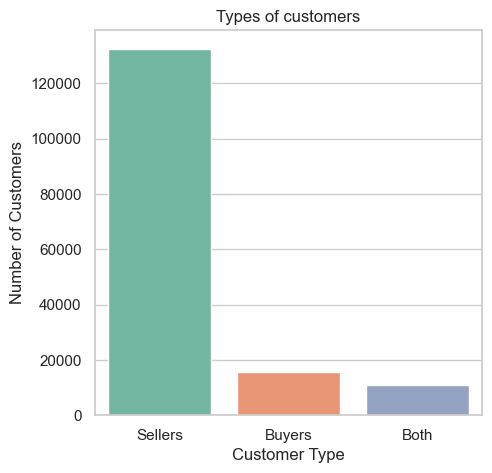

In [206]:
customer_counts = {
    'Sellers': unique_customers_df1,
    'Buyers': unique_customers_df2,
    'Both': unique_customers_intersection
}

plt.figure(figsize=(5, 5))
sns.barplot(x=list(customer_counts.keys()), y=list(customer_counts.values()), palette="Set2")

# Customize plot
plt.title("Types of customers")
plt.ylabel("Number of Customers")
plt.xlabel("Customer Type")
plt.savefig('unique_customers.png', dpi=300, bbox_inches='tight')  # Save as PNG file
plt.show()  # Display the plot

Seemingly, some customers can sell the brands without previously buying any products with the same brand.

# 2. We have .com and .co.uk  site 
**Are we getting both datasets**

In [207]:
df_items.currency.unique()

array(['CAD', 'USD'], dtype=object)

In [208]:
df_orders.currency.unique()

array(['CAD', 'USD'], dtype=object)

We cannot see the GBP code there, so we don't have the data from co.uk site, offering the prices in local currency.

# 3. What is the customer lifetime span?

In [209]:
# Group by customer_id and calculate first and last purchase dates for orders
df_orders_clv = df_orders.groupby('customer_id', as_index=False)['created_at'].agg(
    first_purchase_date='min',
    last_purchase_date='max'
)

# Group by customer_id and calculate first and last purchase dates for items
df_items_clv = df_items.groupby('customer_id', as_index=False)['created_at'].agg(
    first_purchase_date='min',
    last_purchase_date='max'
)

# Merge the two DataFrames on customer_id
df_clv_combined = pd.merge(df_orders_clv, df_items_clv, on='customer_id', suffixes=('_orders', '_items'))

# Calculate the overall first and last purchase dates for CLV calculation
df_clv_combined['overall_first_purchase_date'] = df_clv_combined[['first_purchase_date_orders', 'first_purchase_date_items']].min(axis=1)
df_clv_combined['overall_last_purchase_date'] = df_clv_combined[['last_purchase_date_orders', 'last_purchase_date_items']].max(axis=1)

# Calculate CLV in days
df_clv_combined['clv_days'] = (df_clv_combined['overall_last_purchase_date'] - df_clv_combined['overall_first_purchase_date']).dt.days / 365

print(f'Average customer lifetime span among sellers and buyers is {round(df_clv_combined.clv_days.mean())} year')

Average customer lifetime span among sellers and buyers is 1 year


# 4. NPS Score is in the range of 70, which is quite good 

**Need to  investigate the product review and their sentiment**

In [210]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693 entries, 0 to 10692
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Review ID               10693 non-null  int64         
 1   Review Creation Date    10693 non-null  datetime64[ns]
 2   Review Type             10693 non-null  object        
 3   Review Status           10693 non-null  object        
 4   Status Details          0 non-null      float64       
 5   Review Source           10693 non-null  object        
 6   Review Score            10693 non-null  int64         
 7   Review Title            10691 non-null  object        
 8   Review Content          10691 non-null  object        
 9   Sentiment Score         10687 non-null  float64       
 10  Profanity Flag          45 non-null     float64       
 11  Published Image URLs    0 non-null      float64       
 12  Unpublished Image URLs  139 non-null    object

In [211]:
df_product_reviews = df_reviews[df_reviews['Review Type'] == 'product_review']

In [212]:
bins = [-float('inf'), 0, 0.5, float('inf')]  # Bins for Negative, Neutral, Positive
labels = ['Negative', 'Neutral', 'Positive']  # Corresponding labels

# Categorize sentiment scores
df_product_reviews['Sentiment Category'] = pd.cut(df_product_reviews['Sentiment Score'], bins=bins, labels=labels)

C:\Users\user\AppData\Local\Temp\ipykernel_11044\3263006893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product_reviews['Sentiment Category'] = pd.cut(df_product_reviews['Sentiment Score'], bins=bins, labels=labels)


In [213]:
df_review_sentiment_scores = df_product_reviews.groupby('Sentiment Category', as_index=False).agg(count_of_reviews=('Review ID', 'count'))
df_review_sentiment_scores

C:\Users\user\AppData\Local\Temp\ipykernel_11044\2677834134.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_review_sentiment_scores = df_product_reviews.groupby('Sentiment Category', as_index=False).agg(count_of_reviews=('Review ID', 'count'))


,Sentiment Category,count_of_reviews
0,Negative,27
1,Neutral,433
2,Positive,4698


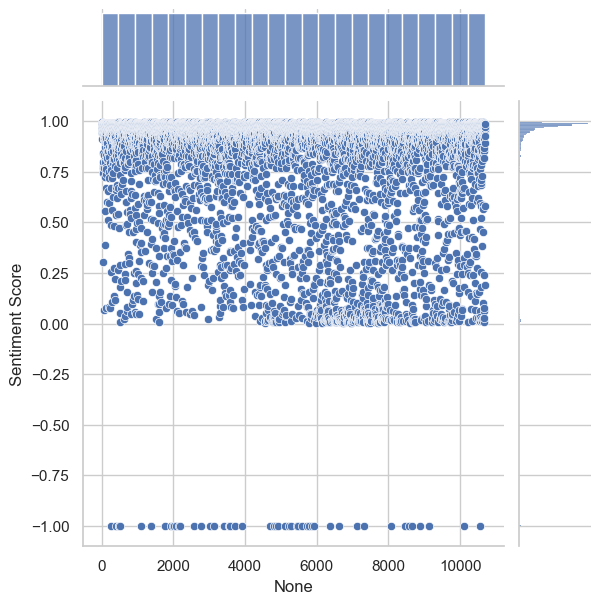

In [214]:
sns.jointplot(df_reviews['Sentiment Score'])
plt.savefig('sentiment scores distribution.png', dpi=300, bbox_inches='tight')

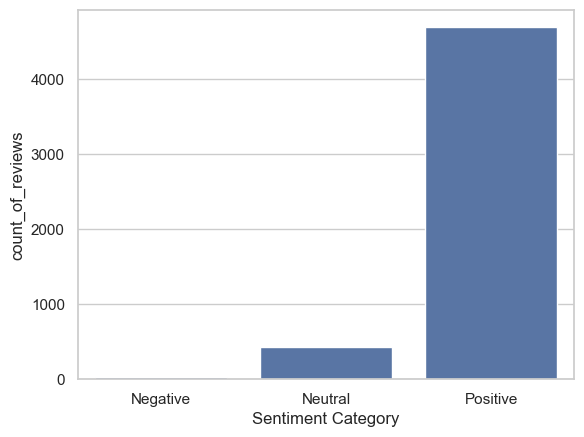

In [215]:
sns.barplot(data=df_review_sentiment_scores, x='Sentiment Category', y='count_of_reviews')
plt.savefig('count of sent scores by categories.png', dpi=300, bbox_inches='tight')

**What impact does a posive or negative review as on Sales or product sales**

To answer this question, we must be able to have common Order ID for the Dataset with Reviews and sold products to be able to precisely estimate the effect. 

However, we are enable to define the effect because of the missmatching IDs of Orders, leading to the inability to identify the specific entities.

## 5. Total Customers around 1 M; however repeated rate is only 25% 

**Is that good for a company with such product lifespan ?**

We can calcualte Customer Lifetime Value (CLV) to answer this question. To do so we need to know Average Order Value (AOV)

In [216]:
conversion_rate = 0.75  # 1 CAD = 0.75 USD (you can update this to the current rate)

# Create a new column with totals converted to USD
df_items['total_in_usd'] = df_items.apply(lambda row: row['total'] * conversion_rate if row['currency'] == 'CAD' else row['total'], axis=1)

In [217]:
aov = df_items.total.median()
aov = float(aov)
aov

93.75

In [218]:
clv = round(aov * 0.25 * 1, 2)
print(f'CLV is {clv}. We need to compare it to Customer Aquisition Costs (CAC) to say whether we earn money from orders or spend more time on promotion.')

CLV is 23.44. We need to compare it to Customer Aquisition Costs (CAC) to say whether we earn money from orders or spend more time on promotion.


We can also evaluate projected revenue with the following calcualtions

In [219]:
total_expected_revenue = 1000000 * clv

In [220]:
print(f'The Total Expected Revenue of the project is at least {total_expected_revenue}')

The Total Expected Revenue of the project is at least 23440000.0


## 6. So from the date of purchase to the date of your golf club lifespan users buy what ?

In [221]:
lifespan_mapping = {
    'Driver': 3,
    'Iron Set': 5,
    'Putter': 5,
    'Fairway Wood': 5,
    'Wedge': 5,
    'Hybrid': 5,
    'Club Set': 5
}
df_purchases = df_items[df_items.status == 'Accepted']
df_purchases['min_lifespan_days'] = df_purchases['product_type'].map(lifespan_mapping) * 365

# Get the first purchase date for each customer
first_purchase_dates = df_purchases.sort_values('created_at').groupby('customer_id').first().reset_index()
first_purchase_dates = first_purchase_dates[['customer_id', 'created_at', 'product_type']]
first_purchase_dates.columns = ['customer_id', 'first_purchase_date', 'first_product_type']

# Merge first purchase dates with original data
df_merged = pd.merge(df_purchases, first_purchase_dates, on='customer_id')

# Filter purchases within the minimum lifespan after the first purchase
df_merged['within_lifespan'] = (df_merged['created_at'] >= df_merged['first_purchase_date']) & \
                                (df_merged['created_at'] <= df_merged['first_purchase_date'] + pd.to_timedelta(df_merged['min_lifespan_days'], unit='d'))

# Collect subsequent purchases in a list
subsequent_purchases = df_merged[df_merged['within_lifespan']].groupby('customer_id')['product_type'].apply(list).reset_index()
subsequent_purchases.columns = ['customer_id', 'subsequent_purchases']

# Merge the subsequent purchases back to the original DataFrame
df_final = pd.merge(first_purchase_dates, subsequent_purchases, on='customer_id', how='left')

# Fill NaN with empty lists
df_final['subsequent_purchases'] = df_final['subsequent_purchases'].apply(lambda x: x if isinstance(x, list) else [])

C:\Users\user\AppData\Local\Temp\ipykernel_11044\3273739942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchases['min_lifespan_days'] = df_purchases['product_type'].map(lifespan_mapping) * 365


In [222]:
df_final

,customer_id,first_purchase_date,first_product_type,subsequent_purchases
0,7,2023-12-14 16:30:00,Driver,"[Wedge, Wedge, Wedge, Driver, Hybrid, Wedge, W..."
1,8,2024-04-04 19:05:00,Hybrid,"[Fairway Wood, Putter, Hybrid, Hybrid, Hybrid,..."
2,9,2024-06-27 20:20:00,Fairway Wood,"[Driver, Driver, Fairway Wood, Driver, Driver,..."
3,85,2021-12-22 22:00:00,Fairway Wood,"[Fairway Wood, Driver, Iron Set, Fairway Wood,..."
4,2253,2021-10-12 15:30:00,Driver,"[Driver, Putter, Driver, Driver, Driver, Drive..."
...,...,...,...,...
11486,1193839,2024-09-02 17:40:00,Iron Set,"[Wedge, Wedge, Driver, Fairway Wood, Iron Set,..."
11487,1194013,2024-09-02 22:35:00,Driver,"[Driver, Driver]"
11488,1194202,2024-09-03 15:00:00,Fairway Wood,[Fairway Wood]
11489,1194786,2024-09-04 12:25:00,Putter,[Putter]


In [223]:
# Function to find the most popular post-sale product for each first product type
def most_popular_subsequent(df):
    # Group by the first product type
    grouped = df.groupby('first_product_type')['subsequent_purchases'].apply(list).reset_index()

    # Initialize a list to store the most popular product for each type
    popular_products = []

    for _, row in grouped.iterrows():
        # Flatten the list of subsequent purchases for each first product type
        flat_list = [item for sublist in row['subsequent_purchases'] for item in sublist]
        if flat_list:  # If there are any subsequent purchases
            # Count occurrences of each product and find the most common one
            most_common_product = Counter(flat_list).most_common(1)[0][0]
        else:
            most_common_product = None  # No subsequent purchases

        popular_products.append({
            'first_product_type': row['first_product_type'],
            'most_popular_post_sale': most_common_product
        })

    return pd.DataFrame(popular_products)

# Get the most popular post-sale products for each first product type
popular_products_df = most_popular_subsequent(df_final)

In [224]:
popular_products_df

,first_product_type,most_popular_post_sale
0,Club Set,Fairway Wood
1,Driver,Driver
2,Fairway Wood,Fairway Wood
3,Hybrid,Hybrid
4,Iron Set,Iron Set
5,Putter,Driver
6,Wedge,Wedge


**What are they golf balls, bags**

According to Google, the average lifespan for golf balls is 1-2 months, while for bags its about 8 years.

**How do the brand keep intouch with it client during that 2-4 years ? Any campaign, what tool, get we get some campaign history ?**

The data itself give no extensive answer to this question. However the brand collects and studies the reviews of from the different sources to estimate the satisfaction rate of the clients.

We don't have the campaign history itself. However, utilizing Google Tag Manager and Google Analytics 4 will help to study and adapt to the behavior of the site or app users. The tools also enable the companies to evaluate and optimize the efficiency of the campaigns.

# 7. Store credits are given based on transactions

only 40% of customers used the store credits. why?

**Is credit too low, not appealing, brand power issues**

The scope of the possible problems is the following:
- Many customers might not be aware that they have earned store credits, either due to ineffective communication or unclear instructions;
- If the amount of store credit earned is small relative to the total purchase value or if the discounts from credits are perceived as insignificant, customers may not be motivated to use them;
- Customers who don't shop often may not accumulate enough credits to use, or they may forget about the store credits between long intervals between purchases;
- Some customers may misunderstand how the credits work.

**Why people will keep buying these consumable with Laps.com in comparison to competitors**:

For Casual Buyers:

The platform provides the ability to find the best price for almost each golf product or sell the golf products themselves;

For Professionals:

The ability to select the golf products using the specific criteria. At the same time, the sellers can earn money on the platform by choosing the best price and analyzing other offers.

**What the incentive ?**

- Subsription plan. The clients will regularly receive consumables by the end of the lifespan of products;
- Personal offers. Provision of individual discounts to the specific segments of buyers;
- Decrease commission for sellers. The sellers will get more money according to their account level;
- Notifications. The clients may subscribe to specific products or categories of products to be notified when the new goods appear on the platform with special offer.

# 8. All used golf products are resold as refurbished product with certified accrediation 

How many sales, revenue, aov, arpu , total customers 

In [225]:
all_sales = df_purchases.purchase_order_id.nunique()
all_sales

24535

In [226]:
df_purchases.head(3)

,id,customer_id,purchase_order_id,status,model,product_type,brand,model_id,brand_id,product_type_id,...,currency,subtotal,margin_total,bonus_total,total,created_at,received_at,inspected_at,total_in_usd,min_lifespan_days
6,767187,416249,43117,Accepted,M1 460 2017,Driver,TaylorMade,8285,28,2,...,CAD,NaN,0.0,17.5,192.5,2021-09-10 02:30:00,NaT,2021-09-23 12:15:00,144.375,1095
7,767188,392519,43118,Accepted,Huntington Beach Soft 4,Putter,Cleveland,34902,7,6,...,CAD,NaN,0.0,6.0,66.0,2021-09-10 02:30:00,NaT,2021-09-23 14:33:00,49.500,1825
8,767189,392519,43118,Accepted,G SF Tec,Driver,Ping,7773,21,2,...,CAD,NaN,0.0,16.5,181.5,2021-09-10 02:30:00,NaT,2021-09-23 14:32:00,136.125,1095


In [227]:
conversion_rate = 0.75
df_purchases['total_in_usd'] = df_purchases.apply(lambda row: round(row['total'] * conversion_rate, 2) if row['currency'] == 'CAD' else row['total'], axis=1)
revenue = round(float(df_purchases.total_in_usd.sum()), 2)

C:\Users\user\AppData\Local\Temp\ipykernel_11044\2371199889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchases['total_in_usd'] = df_purchases.apply(lambda row: round(row['total'] * conversion_rate, 2) if row['currency'] == 'CAD' else row['total'], axis=1)


In [228]:
aov

93.75

In [229]:
arpu = revenue / df_purchases.customer_id.nunique()

In [230]:
items_customers = df_items['customer_id']
orders_customers = df_orders['customer_id']
all_customers = pd.concat([items_customers, orders_customers])
arpu = revenue / all_customers.nunique()

In [231]:
print(
    f'''
Number of Sales - {all_sales}
Revenue - {revenue}
AOV - {aov}
ARPU - {arpu}
Total Customers - {all_customers.nunique()}
    ''')


Number of Sales - 24535
Revenue - 17936642.18
AOV - 93.75
ARPU - 130.86708142419377
Total Customers - 137060
    


**Who are these customers , are they new customers or exisiting customers**

Skip this questions, not enough information what to find here

**how many customers buiying the refurbish product comeback ?**

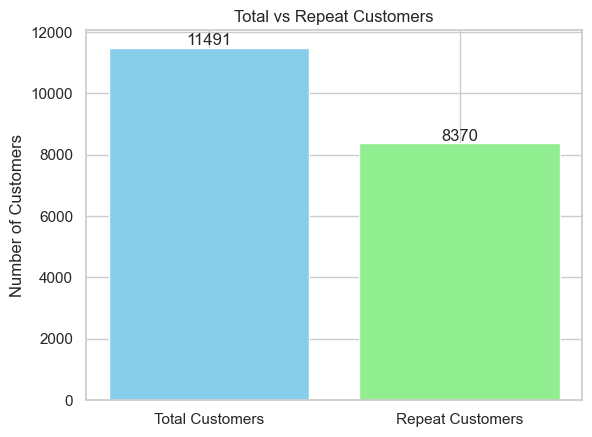

<Figure size 640x480 with 0 Axes>

In [232]:
customer_purchase_counts = df_purchases.groupby('customer_id').size()

# Step 2: Identify repeat customers (more than 1 purchase)
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].index

# Step 3: Calculate the share of repeat customers
total_customers = df_purchases['customer_id'].nunique()  # Total unique customers
repeat_customer_count = len(repeat_customers)            # Count of repeat customers
categories = ['Total Customers', 'Repeat Customers']
counts = [total_customers, repeat_customer_count]
plt.bar(categories, counts, color=['skyblue', 'lightgreen'])
plt.ylabel('Number of Customers')
plt.title('Total vs Repeat Customers')

# Annotate the bar plot with values
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Display the plot
plt.show()
plt.savefig('repeat_customers.png', dpi=300, bbox_inches='tight')

In [233]:
print(f'{repeat_customer_count} customers has come back after the first buy.')

8370 customers has come back after the first buy.


**Has any of the customers buying refurbish used store credit , what %**

**Has any of the customers buying refurbish bought new golf product , what %**

Datasets doesn't indicate the information about the store credits and whether the products are new or refurbished, need to get more context to answer the questions.

# 9. Type of customers

Customers buy refurbish/new/consumable golf product  , how many comback ?

In [234]:
print(f'{repeat_customer_count} customers has come back after the first buy of refurbish/new/consumable golf products.')

8370 customers has come back after the first buy of refurbish/new/consumable golf products.


In [235]:
customer_seller_counts = df_orders.groupby('customer_id').size()

# Step 2: Identify repeat customers (more than 1 purchase)
repeat_sellers = customer_seller_counts[customer_seller_counts > 1].index
repeat_sellers_count = len(repeat_sellers)
total_sellers = df_orders['customer_id'].nunique()  

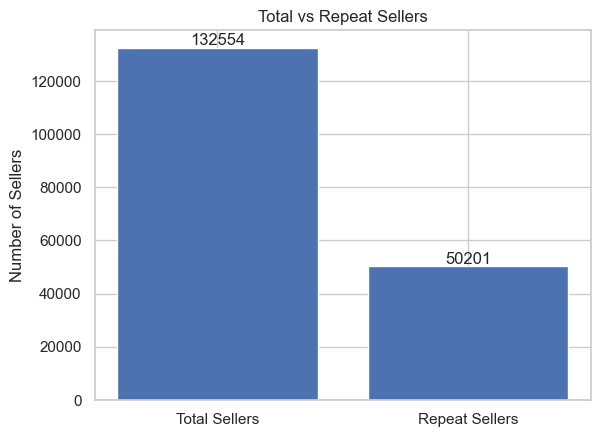

<Figure size 640x480 with 0 Axes>

In [236]:
categories = ['Total Sellers', 'Repeat Sellers']
counts = [total_sellers, repeat_sellers_count]
plt.bar(categories, counts)
plt.ylabel('Number of Sellers')
plt.title('Total vs Repeat Sellers')

# Annotate the bar plot with values
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Display the plot
plt.show()
plt.savefig('repeat_sellers.png', dpi=300, bbox_inches='tight')

In [237]:
print(f'{repeat_sellers_count} customers has come back after the first sell of golf products.')

50201 customers has come back after the first sell of golf products.


# 10. Using analysis of customer movement to show how many customers are returning?

In [238]:
# Convert 'created_at' to datetime
df_orders['created_at'] = pd.to_datetime(df_orders['created_at'])

# Step 1: Create cohort by identifying first purchase date
df_orders['cohort'] = df_orders.groupby('customer_id')['created_at'].transform('min')

# Step 2: Extract cohort year and month (without time)
df_orders['cohort_year_month'] = df_orders['cohort'].dt.to_period('M')

# Step 3: Extract purchase year and month (without time)
df_orders['purchase_year_month'] = df_orders['created_at'].dt.to_period('M')

# Step 4: Calculate the cohort index (the number of months between the cohort and the purchase)
df_orders['cohort_index'] = df_orders.apply(
    lambda row: (row['purchase_year_month'] - row['cohort_year_month']).n if pd.notna(row['purchase_year_month']) and pd.notna(row['cohort_year_month']) else None,
    axis=1
)

# Convert cohort_index to integers
df_orders['cohort_index'] = df_orders['cohort_index'].astype('Int64')

# Step 5: Group by cohort and cohort index and count unique customers
cohort_data = df_orders.groupby(['cohort_year_month', 'cohort_index'])['customer_id'].nunique().reset_index()

# Step 6: Pivot the cohort_data to create a matrix for analysis
cohort_pivot = cohort_data.pivot(index='cohort_year_month', columns='cohort_index', values='customer_id')

# Step 7: Calculate the percentage of customers in each cohort index relative to the 0 period
cohort_pivot_percentage = cohort_pivot.div(cohort_pivot[0], axis=0) * 100

# Step 8: Select only the first 10 periods
cohort_pivot_percentage = cohort_pivot_percentage.iloc[:, :11]  # Select first 10 periods plus the 0 period

# Step 10: Limit the cohort to only include from Dec 2022 to Sep 2024
cohort_pivot_percentage = cohort_pivot_percentage.loc[
    (cohort_pivot_percentage.index >= '2022-12') & 
    (cohort_pivot_percentage.index <= '2024-09')
]

# Step 11: Apply conditional formatting to highlight min and max values
def highlight_min_max(s):
    is_min = s == s.min()
    is_max = s == s.max()
    return ['background-color: yellow' if v else 'background-color: lightgreen' if is_max.iloc[i] else '' for i, v in enumerate(is_min)]

# Step 12: Format the DataFrame to display with 2 decimal places
styled_cohort_sellers = cohort_pivot_percentage.style \
    .apply(highlight_min_max) \
    .format("{:.2f}")  # Format to 2 decimal places

In [239]:
styled_cohort

cohort_index,0,1,2,3,4,5,6,7,8,9,10
cohort_year_month,,,,,,,,,,,
2022-12,100.00,4.50,1.70,1.05,2.43,2.15,2.07,1.78,1.09,0.85,0.77
2023-01,100.00,3.95,3.02,3.02,2.32,2.51,1.95,1.67,1.11,1.16,1.21
2023-02,100.00,4.38,4.12,2.59,2.80,2.06,1.64,0.79,1.06,1.21,1.53
2023-03,100.00,5.54,4.06,3.74,2.77,2.07,1.13,1.09,0.90,1.01,1.01
2023-04,100.00,5.58,4.02,2.29,2.21,0.89,1.04,1.19,1.00,0.79,0.96
2023-05,100.00,5.33,4.09,2.50,1.46,1.00,1.09,0.50,0.48,0.80,1.29
2023-06,100.00,5.11,3.43,1.43,1.13,1.21,0.77,0.85,0.85,1.11,1.53
2023-07,100.00,5.37,2.37,1.77,1.84,1.69,1.13,1.06,1.44,2.45,2.09
2023-08,100.00,3.62,2.21,1.99,1.11,0.94,1.27,1.55,1.77,1.99,1.83


In [240]:
# Convert 'created_at' to datetime
df_items['created_at'] = pd.to_datetime(df_items['created_at'])

# Step 1: Create cohort by identifying first purchase date
df_items['cohort'] = df_items.groupby('customer_id')['created_at'].transform('min')

# Step 2: Extract cohort year and month (without time)
df_items['cohort_year_month'] = df_items['cohort'].dt.to_period('M')

# Step 3: Extract purchase year and month (without time)
df_items['purchase_year_month'] = df_items['created_at'].dt.to_period('M')

# Step 4: Calculate the cohort index (the number of months between the cohort and the purchase)
df_items['cohort_index'] = df_items.apply(
    lambda row: (row['purchase_year_month'] - row['cohort_year_month']).n if pd.notna(row['purchase_year_month']) and pd.notna(row['cohort_year_month']) else None,
    axis=1
)

# Convert cohort_index to integers
df_items['cohort_index'] = df_items['cohort_index'].astype('Int64')

# Step 5: Group by cohort and cohort index and count unique customers
cohort_data = df_items.groupby(['cohort_year_month', 'cohort_index'])['customer_id'].nunique().reset_index()

# Step 6: Pivot the cohort_data to create a matrix for analysis
cohort_pivot = cohort_data.pivot(index='cohort_year_month', columns='cohort_index', values='customer_id')

# Step 7: Calculate the percentage of customers in each cohort index relative to the 0 period
cohort_pivot_percentage = cohort_pivot.div(cohort_pivot[0], axis=0) * 100

# Step 8: Select only the first 10 periods
cohort_pivot_percentage = cohort_pivot_percentage.iloc[:, :11]  # Select first 10 periods plus the 0 period

# Step 9: Round the values to 2 decimal places
cohort_pivot_percentage = cohort_pivot_percentage.round(2)

# Step 10: Limit the cohort to only include from Dec 2022 to Sep 2024
cohort_pivot_percentage = cohort_pivot_percentage.loc[
    (cohort_pivot_percentage.index >= '2022-12') & 
    (cohort_pivot_percentage.index <= '2024-09')
]

# Step 11: Apply conditional formatting to highlight min and max values
def highlight_min_max(s):
    is_min = s == s.min()
    is_max = s == s.max()
    return ['background-color: yellow' if v else 'background-color: lightgreen' if is_max.iloc[i] else '' for i, v in enumerate(is_min)]

# Step 12: Format the DataFrame to display with 2 decimal places
styled_cohort_buyers = cohort_pivot_percentage.style \
    .apply(highlight_min_max) \
    .format("{:.2f}")  # Format to 2 decimal places

In [241]:
styled_cohort_buyers

cohort_index,0,1,2,3,4,5,6,7,8,9,10
cohort_year_month,,,,,,,,,,,
2022-12,100.00,19.44,1.85,2.78,1.85,nan,0.93,1.85,2.78,2.78,3.70
2023-01,100.00,21.30,4.63,2.78,2.78,4.63,2.78,3.70,4.63,2.78,1.85
2023-02,100.00,13.74,4.95,3.85,2.20,1.65,1.65,2.75,1.65,0.55,1.10
2023-03,100.00,16.10,4.49,2.62,5.24,5.24,3.75,3.00,4.12,1.50,3.37
2023-04,100.00,11.54,3.21,4.06,3.21,2.56,1.92,1.92,1.28,2.14,3.21
2023-05,100.00,14.86,2.59,4.01,3.07,1.89,2.12,1.65,1.42,2.59,2.12
2023-06,100.00,17.36,4.68,3.31,2.20,1.38,0.83,0.83,3.03,1.38,2.48
2023-07,100.00,17.93,2.99,3.91,3.22,2.07,2.30,2.30,2.76,2.76,2.99
2023-08,100.00,16.46,5.06,3.38,1.69,1.27,2.53,1.90,1.69,4.22,2.53


# 11. Are we engaging customer to supply inventory

How many of these customers sold back to Laps.com after/before a purchase; meaning did they make their own equipment for sale

Number of customers appeared among sellers before becoming buyers: 8039
Number of customers appeared among buyers before becoming sellers: 2434


C:\Users\user\AppData\Local\Temp\ipykernel_11044\144558822.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis')


Text(0.5, 1.0, 'Customer Appearance Order Between Orders and Items')

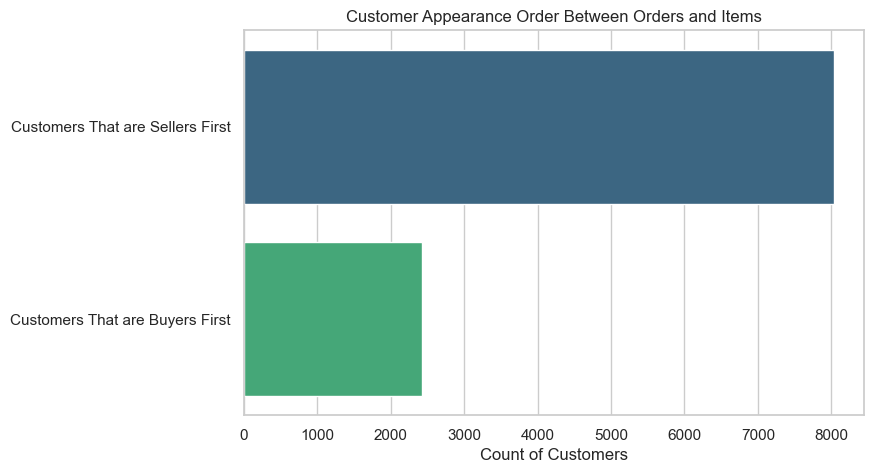

In [242]:
# Step 1: Get the first appearance date of each customer in both datasets
first_orders = df_orders.groupby('customer_id')['created_at'].min().reset_index()
first_orders.columns = ['customer_id', 'first_order_date']

first_items = df_items.groupby('customer_id')['created_at'].min().reset_index()
first_items.columns = ['customer_id', 'first_item_date']

# Step 2: Merge DataFrames to find the appearance order
merged = pd.merge(first_orders, first_items, on='customer_id', how='outer')

# Step 3: Determine the order of appearance
merged['appeared_in_orders_first'] = merged['first_order_date'] < merged['first_item_date']
merged['appeared_in_items_first'] = merged['first_item_date'] < merged['first_order_date']

# Step 4: Count the unique customers based on the conditions
customers_orders_first = merged['appeared_in_orders_first'].sum()
customers_items_first = merged['appeared_in_items_first'].sum()

# Result
print("Number of customers appeared among sellers before becoming buyers:", customers_orders_first)
print("Number of customers appeared among buyers before becoming sellers:", customers_items_first)

# Step 5: Prepare data for visualization
labels = ['Customers That are Sellers First', 'Customers That are Buyers First']
counts = [customers_orders_first, customers_items_first]

# Step 6: Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=counts, y=labels, palette='viridis')

# Add labels and title
plt.xlabel('Count of Customers')
plt.title('Customer Appearance Order Between Orders and Items')

In [243]:
plt.savefig('first_came_as.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

**What percentage of purchases were driven by coupons**

Total Orders: 261287
Orders with Coupons: 1386
Share of Orders with Coupons: 0.53%


C:\Users\user\AppData\Local\Temp\ipykernel_11044\3592388292.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='pastel')


Text(0.5, 1.0, 'Share of Orders with Coupons')

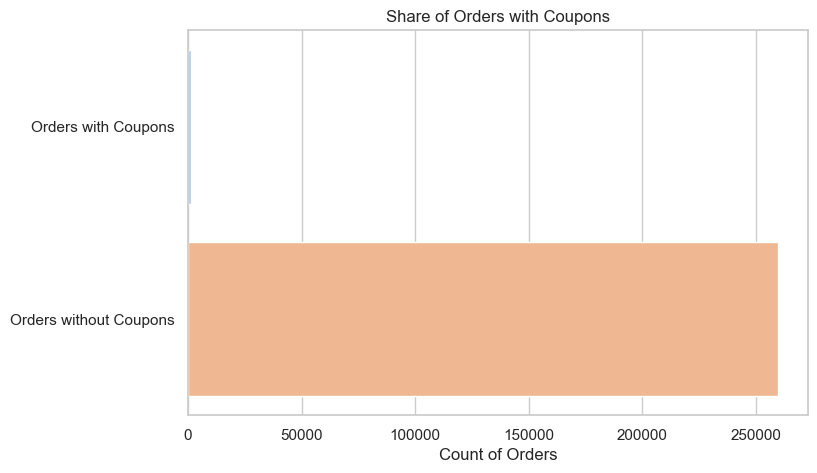

In [244]:
# Calculate the total number of orders
total_orders = df_orders.shape[0]

# Calculate the number of orders with coupons
orders_with_coupons = df_orders['code'].notnull().sum()

# Calculate the share of orders with coupons
share_coupons = (orders_with_coupons / total_orders) * 100

# Output the share
print(f"Total Orders: {total_orders}")
print(f"Orders with Coupons: {orders_with_coupons}")
print(f"Share of Orders with Coupons: {share_coupons:.2f}%")

# Prepare data for visualization
labels = ['Orders with Coupons', 'Orders without Coupons']
counts = [orders_with_coupons, total_orders - orders_with_coupons]

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=counts, y=labels, palette='pastel')

# Add labels and title
plt.xlabel('Count of Orders')
plt.title('Share of Orders with Coupons')

In [245]:
plt.savefig('coupons_orders.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

**What is their repeat rate i.e. power of promotions/coupons for 1st, 2nd 3rd purchase....**

Text(0, 0.5, 'Repeat Rate')

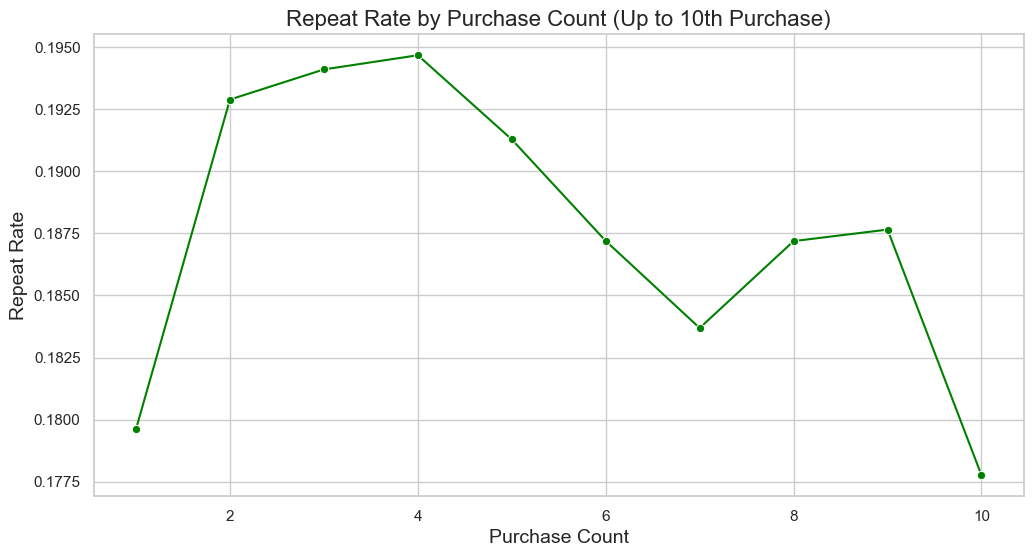

In [246]:
# Calculate purchase counts and coupon usage
df_orders['purchase_count'] = df_orders.groupby('customer_id').cumcount() + 1  # Start counting from 1
df_orders['used_coupon'] = df_orders['code'].notnull().astype(int) | df_orders['description.1'].notnull().astype(int)

# Group by purchase count to get total purchases
repeat_rate = df_orders.groupby('purchase_count').agg(
    total_purchases=('customer_id', 'count'),
    total_with_coupon=('used_coupon', 'sum')
).reset_index()

# Calculate repeat rate
repeat_rate['repeat_rate'] = repeat_rate['total_with_coupon'] / repeat_rate['total_purchases']

# Filter to include only up to the 10th purchase
repeat_rate_filtered = repeat_rate[repeat_rate['purchase_count'] <= 10]

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot repeat rate
sns.lineplot(data=repeat_rate_filtered, x='purchase_count', y='repeat_rate', marker='o', color='green')

# Set labels and title
plt.title('Repeat Rate by Purchase Count (Up to 10th Purchase)', fontsize=16)
plt.xlabel('Purchase Count', fontsize=14)
plt.ylabel('Repeat Rate', fontsize=14)


In [247]:
plt.savefig('repeat_rate.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

**Does the data contain goldbidder/golf avenue**

In [248]:
# Function to check for brands and display results
def check_brands(df, brand_name):
    filtered_data = df[df['brand'] == brand_name][['id', 'brand']]
    return filtered_data.head(3) if not filtered_data.empty else None

# Check for 'Gold Avenue' in both DataFrames
gold_avenue_orders = check_brands(df_orders, 'Golf Avenue')
gold_avenue_items = check_brands(df_items, 'Golf Avenue')

# Check for 'Goldbidder' in both DataFrames
goldbidder_orders = check_brands(df_orders, 'Golfbidder')
goldbidder_items = check_brands(df_items, 'Golfbidder')

# Display results
print("Gold Avenue in among sold goods:\n", gold_avenue_orders)
print("\nGold Avenue in among bought goods:\n", gold_avenue_items)
print("\nGoldbidder in among sold goods:\n", goldbidder_orders)
print("\nGoldbidder in among bought goods:\n", goldbidder_items)

Gold Avenue in among sold goods:
           id        brand
689   680160  Golf Avenue
755   680988  Golf Avenue
2829  684084  Golf Avenue

Gold Avenue in among bought goods:
              id        brand
117173  1654299  Golf Avenue
117174  1654300  Golf Avenue
117175  1654301  Golf Avenue

Goldbidder in among sold goods:
 None

Goldbidder in among bought goods:
 None


**Define the consumables**

- Golf Balls

- Golf Grips

- Golf Towels

- Ball Markers

- Gloves

- Putter Covers

In [249]:
df_orders.type.unique()

array(['Iron Set', 'Hybrid', 'Individual Iron', 'Driver', 'Golf Bag',
       'Fairway Wood', 'Wedge', 'Putter', 'Shorts', 'Golf Shoes', 'Glove',
       'Golf Balls', nan, 'Headwear', 'Top', 'Pants', 'Club Set', 'Towel',
       'Water Bottle', 'Tradein Package', 'Accessory', 'GPS Watch',
       'Headcover', 'Golf Cart', 'Outerwear', 'Umbrella', 'Tool',
       'Range Finder', 'Putting Mat', 'Launch Monitor', 'Travel Cover',
       'Tees', 'Skirt', 'Belt', 'Golf Socks', 'Speaker'], dtype=object)

Top 3 Combos of Consumables and Equipment:
(Golf Balls, Top)      428
(Golf Balls, Wedge)    326
(Glove, Top)           300
Name: count, dtype: int64


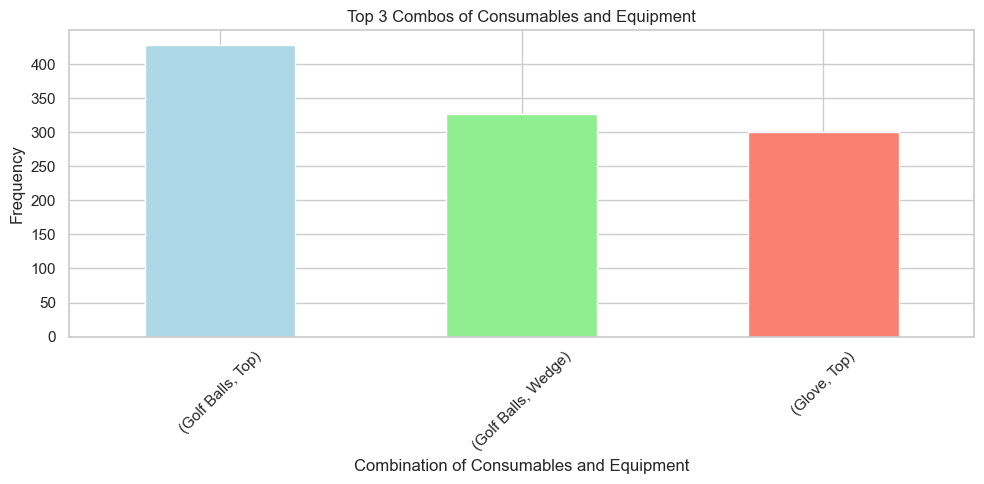

In [250]:
# Assuming df_orders is already defined and loaded

# Define consumables
consumables = ['Golf Balls', 'Tees', 'Glove', 'Towel', 'Water Bottle']

# Get all unique types from the DataFrame
all_types = df_orders['type'].unique()

# Define equipment as all types that are not consumables
equipment = [item for item in all_types if item not in consumables]

# Filter orders with consumables
df_consumables = df_orders[df_orders['type'].isin(consumables)]

# Create a DataFrame that contains only orders with consumables
combined_df = df_orders[df_orders['order_id'].isin(df_consumables['order_id'])]

# Group by order_id and aggregate the types
grouped = combined_df.groupby('order_id')['type'].apply(list).reset_index()

# Create a list to store combinations
combo_list = []

# Create combinations of consumables and equipment from each order
for index, row in grouped.iterrows():
    items = row['type']
    combos = [combo for combo in combinations(items, 2) if combo[0] in consumables and combo[1] in equipment]
    combo_list.extend(combos)

# Count the frequency of each combination
combo_counts = pd.Series(combo_list).value_counts()

# Get the top 3 combinations
top_combos = combo_counts.head(3)

# Print out the top combinations
print("Top 3 Combos of Consumables and Equipment:")
print(top_combos)

# Visualize the results
plt.figure(figsize=(10, 5))
top_combos.plot(kind='bar', color=['lightblue', 'lightgreen', 'salmon'])
plt.title('Top 3 Combos of Consumables and Equipment')
plt.xlabel('Combination of Consumables and Equipment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

In [251]:
plt.savefig('combos.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

**People who bought drivers vs a set of clubs, multiple drivers**

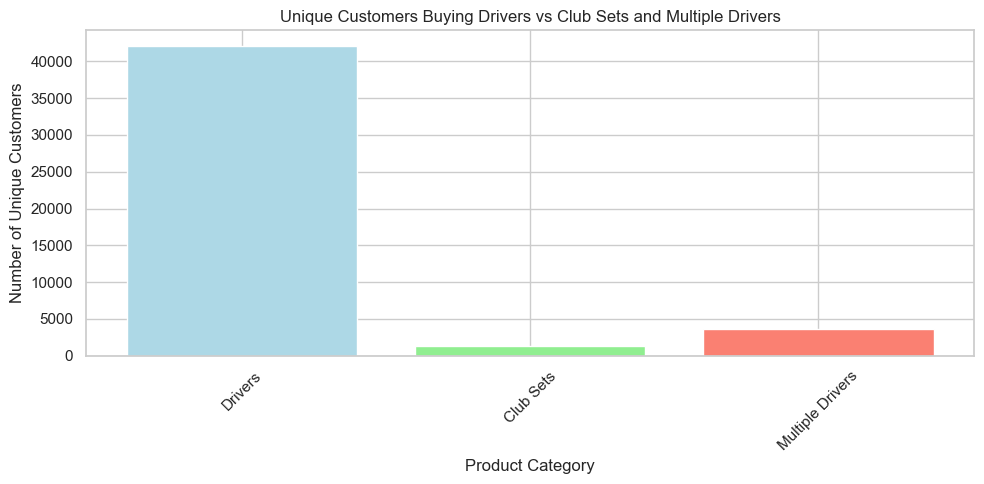

In [252]:
# Define categories of interest
drivers = 'Driver'
club_set = 'Club Set'

# Filter orders for drivers and club sets
df_drivers = df_orders[df_orders['type'] == drivers]
df_club_sets = df_orders[df_orders['type'] == club_set]

# Count unique customers who bought drivers
unique_customers_drivers = df_drivers['customer_id'].nunique()

# Count unique customers who bought club sets
unique_customers_club_sets = df_club_sets['customer_id'].nunique()

# Identify customers who bought multiple drivers
multiple_drivers_customers = df_drivers['customer_id'].value_counts()
customers_multiple_drivers = multiple_drivers_customers[multiple_drivers_customers > 1].count()

# Prepare data for visualization
data = {
    'Drivers': unique_customers_drivers,
    'Club Sets': unique_customers_club_sets,
    'Multiple Drivers': customers_multiple_drivers
}

# Create a DataFrame for visualization
summary_df = pd.DataFrame(data.items(), columns=['Category', 'Unique Customers'])

# Define colors for each category
colors = ['lightblue', 'lightgreen', 'salmon']

# Visualize the results
plt.figure(figsize=(10, 5))
plt.bar(summary_df['Category'], summary_df['Unique Customers'], color=colors)
plt.title('Unique Customers Buying Drivers vs Club Sets and Multiple Drivers')
plt.xlabel('Product Category')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.tight_layout()

In [253]:
plt.savefig('drivers.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

**Inference novice vs. expert**

In [254]:
# For Buyers (df_orders)
buyers = df_orders.groupby('customer_id').agg({
    'purchase_count': 'sum',
    'total': 'sum',
    'type': pd.Series.nunique
}).reset_index()

# For Sellers (df_items)
sellers = df_items.groupby('customer_id').agg({
    'purchase_order_id': 'count',
    'total_in_usd': 'sum',
    'product_type': pd.Series.nunique
}).reset_index()

# Define thresholds for novice vs expert (you can adjust these thresholds)
buyer_threshold = buyers['purchase_count'].quantile(0.75)
seller_threshold = sellers['purchase_order_id'].quantile(0.75)

# Classify Novice vs Expert
buyers['classification'] = buyers['purchase_count'].apply(lambda x: 'Expert' if x > buyer_threshold else 'Novice')
sellers['classification'] = sellers['purchase_order_id'].apply(lambda x: 'Expert' if x > seller_threshold else 'Novice')

# Identify customers who are both buyers and sellers
both = pd.merge(buyers, sellers, on='customer_id', how='inner', suffixes=('_buyer', '_seller'))

# Visualization (e.g., using Venn Diagram or bar charts)

<Figure size 800x600 with 0 Axes>

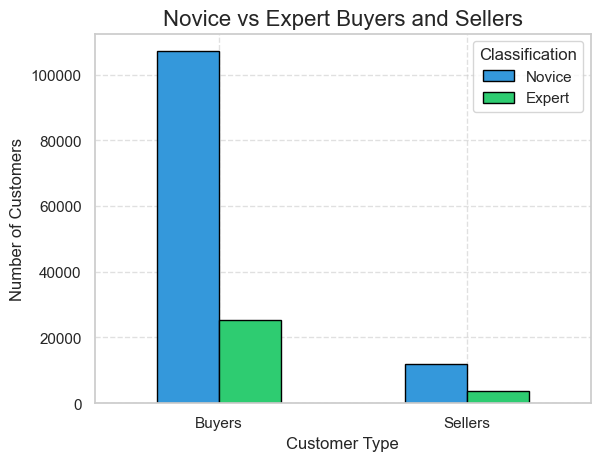

In [255]:
buyer_counts = buyers['classification'].value_counts()

# Count the number of novice and expert sellers
seller_counts = sellers['classification'].value_counts()

# Combine the two counts into one dataframe for comparison
classification_counts = pd.DataFrame({
    'Buyers': buyer_counts,
    'Sellers': seller_counts
}).T

# Plot the bar chart
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', stacked=False, color=['#3498db', '#2ecc71'], edgecolor='black')

# Customize the plot
plt.title("Novice vs Expert Buyers and Sellers", fontsize=16)
plt.ylabel("Number of Customers", fontsize=12)
plt.xlabel("Customer Type", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Classification", loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# Save as PNG file and show the plot
plt.savefig('novice_expert_classification.png', dpi=300, bbox_inches='tight')
plt.show()